# 2 Q-Learning

## Question 1

In [15]:
# Importing the necessary modules and instanciating the environment and the agent

import numpy as np
from tic_env_test import TictactoeEnv, OptimalPlayer, Agent
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

env = TictactoeEnv()
agent = Agent()

In [16]:
# Initialize the number of games and the turns

nb_games = 20000
Turns = np.array(['X','O'])

# Initialize table of Q_values
state_space = 19683
action_space = 9
Q = np.zeros([state_space, action_space])

# Initialize hyper-parameters
alpha = 0.05
gamma = 0.99
eps = 0.

# Initialize lists for reward tracking
mean_reward = np.zeros(int(nb_games/250))
Reward = []
p = 0

In [17]:
# For each number of games
for i in range(nb_games):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0.5, player=Turns[0])
    player_agent = Agent(epsilon=eps, player=Turns[1])
    
    
    # For each step in range max_steps
    for j in range(9):
        # If it is the optimal player's turn: optimal player plays and a step is made
        # A reward is given to the agent and Q values are updated after the optimal player has played
        if env.current_player == player_opt.player:

            move_opt = player_opt.act(grid)

            grid, end, winner = env.step(move_opt, print_grid=False)
                                         
            if env.num_step > 1:
                
                if end == False: #update Q values of agent

                    rt_agent = env.reward(player = player_agent.player)

                    max_q_prime = agent.Max_Q_prime(grid, Q, end)
                    
                    Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                    

                elif end==True: #if last iteration still update agent and break

                    rt_agent = env.reward(player = player_agent.player)

                    Reward.append(rt_agent)
                    
                    max_q_prime = 0 
                    
                    Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    break
            else:
                pass
        
        # If it is the agent's turn: chose best action following epsilon greedy policy
        # make a step and update the grid

        else:
            move_agent = player_agent.act_Q_Learning(grid, Q)
                        
            grid_prev = grid.copy()

            grid, end, winner = env.step(move_agent, print_grid=False)

            nb_agent = agent.state2int(grid_prev)

            a_agent = agent.action_index(move_agent)
            
            if end: # attributes rewards to the agent and updates Q values accordingly if it is the end, then break
                rt_agent = env.reward(player = player_agent.player)
                Reward.append(rt_agent)
                
                max_q_prime = 0 
                
                Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                

                break
    # store average reward in a list every 250 iterations
    if i%250 == 0:
        mean_reward[p] = np.mean(Reward)
        Reward = []
        p += 1   

Text(0, 0.5, 'av. reward')

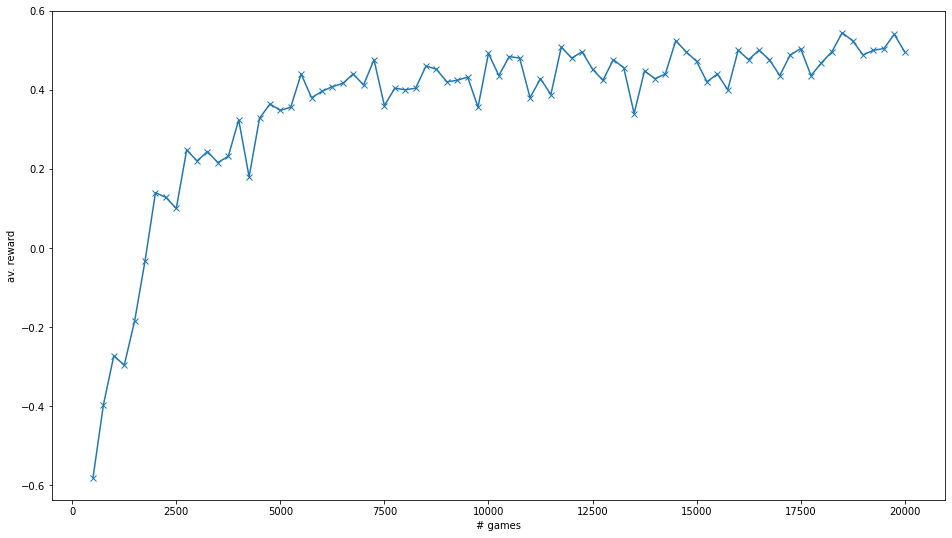

In [18]:
# PLot the average reward with epsilon=0

plt.figure(figsize=(16,9))
plt.plot(np.linspace(500,nb_games,79), mean_reward[1:], 'x-')
plt.xlabel("# games")
plt.ylabel("av. reward")
# plt.title("Average Reward (eps = 0)")

With an epsilon of 0, the agent's average reward increases over the number of epochs and stabilizes around 0.5. The agent therefore learns how to play TicTacToe since it is losing less and less (positive average reward).

## Question 2

In [5]:
# Initialize n* values from 1 to 40000 with 6 elements
n_star = np.linspace(1,40000,6)

# Initialize lists for reward tracking
mean_reward_epsmod = np.zeros((len(n_star), int(nb_games/250)))
Reward = []

In [6]:
# Iterate over the number of n* values and reset the Q-values at zero
for n in range(len(n_star)):
    Q = np.zeros([state_space, action_space])
    p = 0
    # For each number of games
    for i in range(nb_games):
        env.reset()
        grid, _, __ = env.observe()
        Turns = Turns[np.random.permutation(2)]
        player_opt = OptimalPlayer(epsilon=0.5, player=Turns[0])
        # Define the right epsilon depending on n*
        eps_min = 0.1
        eps_max = 0.8
        eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))
        player_agent = Agent(epsilon=eps_mod, player=Turns[1])

        for j in range(9):

            if env.current_player == player_opt.player:
                move_opt = player_opt.act(grid)
                grid, end, winner = env.step(move_opt, print_grid=False)

                if env.num_step > 1:

                    if end == False:
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)

                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    elif end==True: #if last iteration still update agent 
                        rt_agent = env.reward(player = player_agent.player)
                        Reward.append(rt_agent)

                        max_q_prime = 0 

                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                        break
                else:
                    pass

            else:
                move_agent = player_agent.act_Q_Learning(grid, Q)

                grid_prev = grid.copy()

                grid, end, winner = env.step(move_agent, print_grid=False)

                nb_agent = agent.state2int(grid_prev)
                a_agent = agent.action_index(move_agent)

                if end:
                    rt_agent = env.reward(player = player_agent.player)
                    Reward.append(rt_agent)

                    max_q_prime = 0 

                    Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    break

        # Store the mean reward in a list of lists
        if i%250 == 0:
            mean_reward_epsmod[n,p] = np.mean(Reward)
            Reward = []
            p += 1   

Text(0, 0.5, 'av. reward')

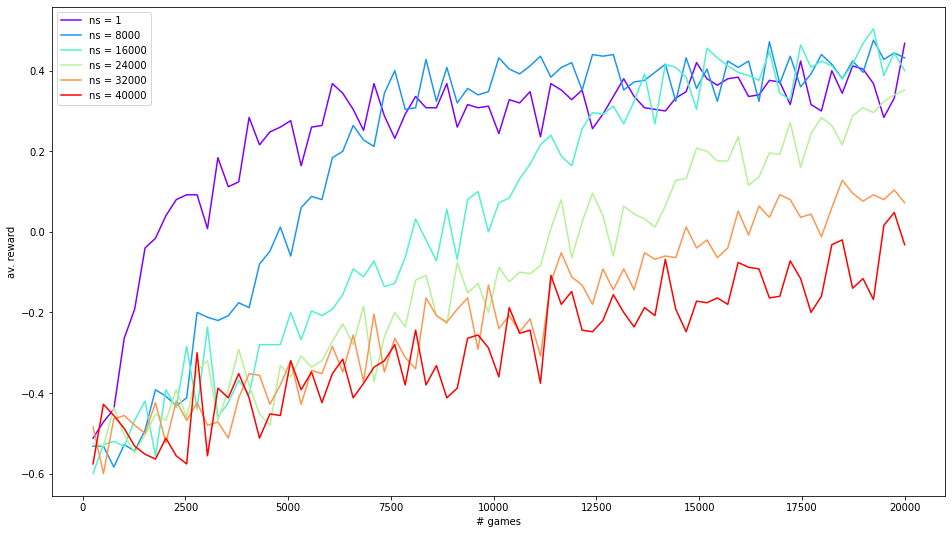

In [7]:
# Plot the average reward for different n*

from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, len(n_star))))

plt.figure(figsize=(16,9))
for n in range(len(n_star)):
    c = next(color)
    plt.plot(np.linspace(250,nb_games,79), mean_reward_epsmod[n][1:], '-', c=c)
plt.legend(['ns = 1', 'ns = 8000', 'ns = 16000', 'ns = 24000', 'ns = 32000', 'ns = 40000'])
plt.xlabel("# games")
plt.ylabel("av. reward")
# plt.title("Average Reward for different n*")

Increasing the value of n* should make the agent explore the state/action pair domain more than with a small n*. As one can see from Figure \ref{Fig:q2}, on one side, a high value of n* reduces the rate of learning of the agent (red curve did not reach a steady state, whereas blue curve did), however on the other side, the agent explores more possibilities. Considering a maximum number of 20'000 epochs, the optimal n* would be the one used for the green curve $n^* = 16000$. This way, the agent explores a maximum number of possibilities before reaching a steady average reward against Opt(0.5). Decreasing epsilon over the number of games makes training last longer compared to training with fixed epsilon: for example, here with $n^* =16'000$, the steady state is reached after 7500 games played versus 5000 games for $\epsilon = 0$ fixed.

## Question 3

In [8]:
# Initialize the number of games to 20'000
nb_games = 20000

# Initialize lists for reward tracking
Mopt = np.zeros((len(n_star), int(nb_games/250)))
Mrand = np.zeros((len(n_star), int(nb_games/250)))

In [9]:
for n in range(len(n_star)):
    Q = np.zeros([state_space, action_space])
    p = 0
    # For each number of games
    for i in range(nb_games):
        env.reset()
        grid, _, __ = env.observe()
        Turns = Turns[np.random.permutation(2)]
        player_opt = OptimalPlayer(epsilon=0.5, player=Turns[0])

        eps_min = 0.1
        eps_max = 0.8
        eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))
        player_agent = Agent(epsilon=eps_mod, player=Turns[1])

        # For each step in range max_steps
        for j in range(9):

            if env.current_player == player_opt.player:
                move_opt = player_opt.act(grid)
                grid, end, winner = env.step(move_opt, print_grid=False)

                if env.num_step > 1:

                    if end == False:
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)

                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    elif end==True: 
                        rt_agent = env.reward(player = player_agent.player)

                        max_q_prime = 0 

                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                        break
                else:
                    pass

            else:
                move_agent = player_agent.act_Q_Learning(grid, Q)

                grid_prev = grid.copy()

                grid, end, winner = env.step(move_agent, print_grid=False)

                nb_agent = agent.state2int(grid_prev)
                a_agent = agent.action_index(move_agent)

                if end:
                    rt_agent = env.reward(player = player_agent.player)

                    max_q_prime = 0 

                    Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    break

        # Every 250 games, make the agent play against Opt(0) and Opt(1)
        # Store the values Mopt and Mrand in lists of lists
        if i%250 == 0:
            Nwin_opt = 0
            Nlos_opt = 0
            Nwin_rand = 0
            Nlos_rand = 0
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=0, player=Turns[0])

                eps_min = 0.1
                eps_max = 0.8

                eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))

                player_agent = Agent(epsilon=eps_mod, player=Turns[1])
                

                # For each step in range max_steps
                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)

                    if end:
                        if winner == player_agent.player:
                            Nwin_opt += 1
                        elif winner == player_opt.player:
                            Nlos_opt += 1
                        break
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=1, player=Turns[0])

                eps_min = 0.1
                eps_max = 0.8

                eps_mod = max(eps_min, eps_max*(1-i/n_star[n]))

                player_agent = Agent(epsilon=eps_mod, player=Turns[1])
                

                # For each step in range max_steps
                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)

                    if end:
                        if winner == player_agent.player:
                            Nwin_rand += 1
                        elif winner == player_opt.player:
                            Nlos_rand += 1
                        break
                    
            Mopt[n,p] = (Nwin_opt-Nlos_opt)/500
            Mrand[n,p] = (Nwin_rand-Nlos_rand)/500
            p += 1

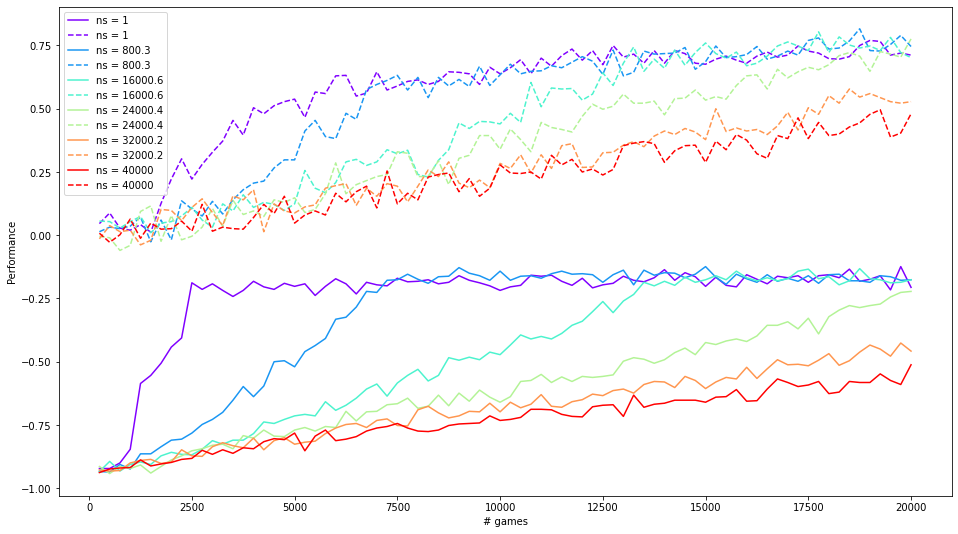

In [10]:
# Plot the results Mopt [-] and Mrand [--] for different values of n*

from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, len(n_star))))

plt.figure(figsize=(16,9))
for n in range(len(n_star)):
    c=next(color)
    plt.plot(np.linspace(250,nb_games,80), Mopt[n], '-', c=c)
    plt.plot(np.linspace(250,nb_games,80), Mrand[n], '--', c=c)
plt.legend(['ns = 1', 'ns = 1', 'ns = 8000', 'ns = 8000' , 'ns = 16000', 'ns = 16000', 'ns = 24000', 'ns = 24000', 'ns = 32000', 'ns = 32000', 'ns = 40000', 'ns = 40000'])
plt.xlabel("# games")
plt.ylabel("Performance")
# plt.title("Mopt [-] and Mrand [--] for different values of n*")
plt.show()

The curves on Figure \ref{Fig:q3} are similar to the ones of the previous question: exploring the state/action space during training has a cost on the learning rate throughout the number of games resulting in a higher learning rate for small values of n*. The difference appears when computing against Opt(0) and Opt(1). Indeed, the agent has a higher average reward (max 0.7) when competing against Opt(1): the agent wins more often because the optimal player chooses random actions. On the contrary, the agent learns to make draws against Opt(0) as the latter is supposed to always win and reaches a maximum average reward of -0.2.

## Question 4

In [11]:
# Initialization with fixed n* and variable eps_opt
nb_games = 20000
epsilon_opt = np.linspace(0,1,6)
n_star = 16000

# Initialize lists for reward tracking
Mopt = np.zeros((len(epsilon_opt), int(nb_games/250)))
Mrand = np.zeros((len(epsilon_opt), int(nb_games/250)))


In [12]:
# Iterate over each eps_opt with fixed n*
for epsilon in range(len(epsilon_opt)):
    Q = np.zeros([state_space, action_space])
    p = 0

    for i in range(nb_games):
        env.reset()
        grid, _, __ = env.observe()
        Turns = Turns[np.random.permutation(2)]
        player_opt = OptimalPlayer(epsilon=epsilon_opt[epsilon], player=Turns[0])
        eps_min = 0.1
        eps_max = 0.8
        eps_mod = max(eps_min, eps_max*(1-i/n_star))
        player_agent = Agent(epsilon=eps_mod, player=Turns[1])

        for j in range(9):
            if env.current_player == player_opt.player:
                move_opt = player_opt.act(grid)
                grid, end, winner = env.step(move_opt, print_grid=False)

                if env.num_step > 1:
                    if end == False:
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = agent.Max_Q_prime(grid, Q, end)
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])

                    elif end==True: 
                        rt_agent = env.reward(player = player_agent.player)
                        max_q_prime = 0 
                        Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                        break
                else:
                    pass

            else:
                move_agent = player_agent.act_Q_Learning(grid, Q)
                grid_prev = grid.copy()
                grid, end, winner = env.step(move_agent, print_grid=False)
                nb_agent = agent.state2int(grid_prev)
                a_agent = agent.action_index(move_agent)

                if end:
                    rt_agent = env.reward(player = player_agent.player)
                    max_q_prime = 0 
                    Q[nb_agent,a_agent] = Q[nb_agent,a_agent] + alpha*(rt_agent + gamma*max_q_prime - Q[nb_agent,a_agent])
                    break
        
        # Every 250 games, make the agent play against Opt(0) and Opt(1)
        # Store the values Mopt and Mrand in lists of lists
        if i%250 == 0:
            Nwin_opt = 0
            Nlos_opt = 0
            Nwin_rand = 0
            Nlos_rand = 0
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=0, player=Turns[0])
                eps_min = 0.1
                eps_max = 0.8
                eps_mod = max(eps_min, eps_max*(1-i/n_star))
                player_agent = Agent(epsilon=eps_mod, player=Turns[1])

                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)
                    if end:
                        if winner == player_agent.player:
                            Nwin_opt += 1
                        elif winner == player_opt.player:
                            Nlos_opt += 1
                        break
            
            for k in range(500):
                env.reset()
                grid, _, __ = env.observe()
                Turns = Turns[np.random.permutation(2)]
                player_opt = OptimalPlayer(epsilon=1, player=Turns[0])
                eps_min = 0.1
                eps_max = 0.8
                eps_mod = max(eps_min, eps_max*(1-i/n_star))
                player_agent = Agent(epsilon=eps_mod, player=Turns[1])
                
                for j in range(9):

                    if env.current_player == player_opt.player:
                        move = player_opt.act(grid)
                    else:
                        move = player_agent.act_Q_Learning(grid, Q)

                    grid, end, winner = env.step(move, print_grid=False)
                    if end:
                        if winner == player_agent.player:
                            Nwin_rand += 1
                        elif winner == player_opt.player:
                            Nlos_rand += 1
                        break

            Mopt[epsilon,p] = (Nwin_opt-Nlos_opt)/500
            Mrand[epsilon,p] = (Nwin_rand-Nlos_rand)/500
            p += 1

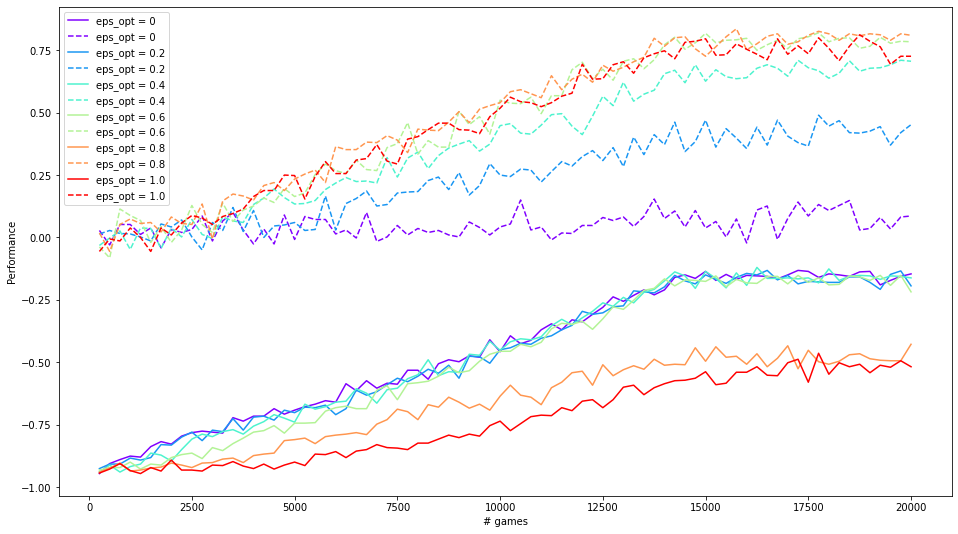

In [13]:
# Plot the results Mopt [-] and Mrand [--] for different values of eps_opt

from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, len(epsilon_opt))))

plt.figure(figsize=(16,9))
for eps in range(len(epsilon_opt)):
    c=next(color)
    plt.plot(np.linspace(250,nb_games,80), Mopt[eps], '-', c=c)
    plt.plot(np.linspace(250,nb_games,80), Mrand[eps], '--', c=c)
plt.legend(['eps_opt = 0', 'eps_opt = 0', 'eps_opt = 0.2', 'eps_opt = 0.2', 'eps_opt = 0.4' , 'eps_opt = 0.4' , 'eps_opt = 0.6', 'eps_opt = 0.6', 'eps_opt = 0.8', 'eps_opt = 0.8', 'eps_opt = 1.0', 'eps_opt = 1.0'])
plt.xlabel("# games")
plt.ylabel("Performance")
# plt.title("Mopt [-] and Mrand [--] for different values of eps_opt")
plt.show()

From the curves above, one can see that when training against an optimal player with a low $\epsilon_{opt}$, the agent is capable of winning more often when playing against the best player Opt(0): for example, at the end of the training against Opt(0), the agent has a performance of -0.2 (purple line), whereas it has a smaller performance of -0.5 at the end of the training against Opt(1) (red line). This can be explained by the fact that the agent updates more often the right Q-values when training against Opt(0) compared to training against Opt(1).
From the curves representing Mrand (dotted lines), a similar but surprising result occurs: the agent who trains against Opt($\epsilon_{opt}$) with an $\epsilon_{opt}$ close to 1 shows the best performance (red dotted line). Whereas the agent who trained against the best optimal player Opt(0) shows only poor performances when playing against a player with a random policy Opt(1). This can be explained by a poor exploration of the state/action space during training against Opt(0).

## Question 5

In [14]:
# Compute the maximum values of Mopt and Mrand
max_Mopt = np.max(Mopt)
print("max_Mopt = ", max_Mopt)
max_Mrand = np.max(Mrand)
print('max_Mrand = ',max_Mrand)


max_Mopt =  -0.12
max_Mrand =  0.836


The highest value of Mopt obtained is -0.136. The highest value of Mrand obtained is 0.868. 

## Question 6

We have seen that when training against Opt(0), the agent exploits the state/action space (s,a) more often rather than exploring it. Hence for a given state s and action a, the agent will update a given Q(s,a) more often. On the other hand, training against Opt(1) will make the agent explore more Q_values but it will not update them as frequently as when training against Opt(0). Hence, for a given state/action pair (s,a), Q_1(s,a) will be different than Q_2(s,a) since Q_1(s,a) will be updated more often if it is the optimal Q_value.  